I have used random forest classification which has highest accuracy among other classifiers

ML model accuracy score for the test: 0.951048951048951
ML model accuracy score: 0.951048951048951
Confusion matrix:
[[69  5]
 [ 2 67]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        74
           1       0.93      0.97      0.95        69

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

Predictions: ['Benign', 'Benign', 'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign']


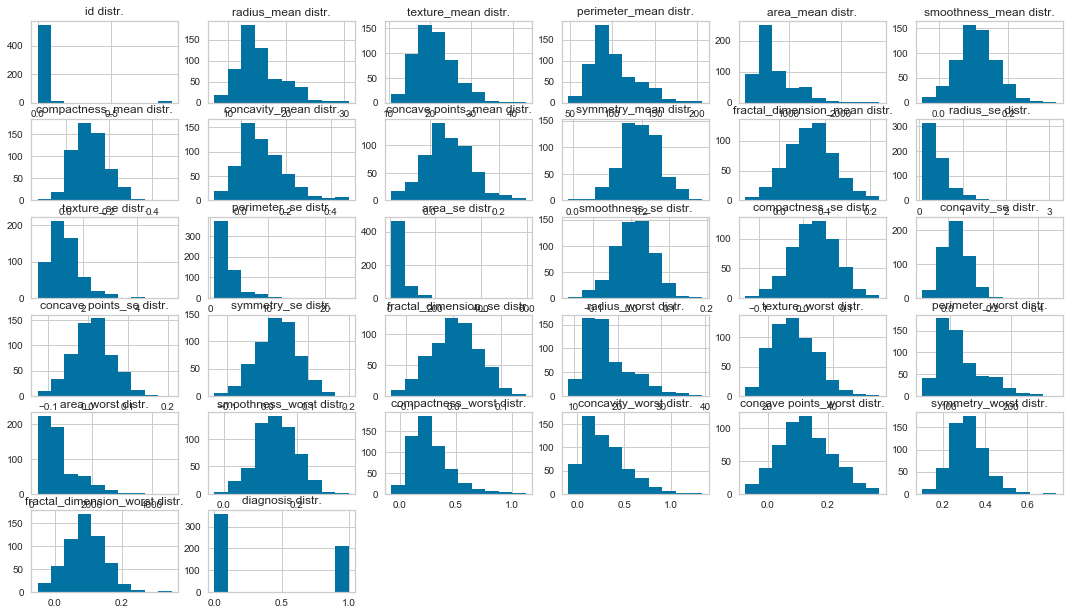

<Figure size 864x576 with 0 Axes>

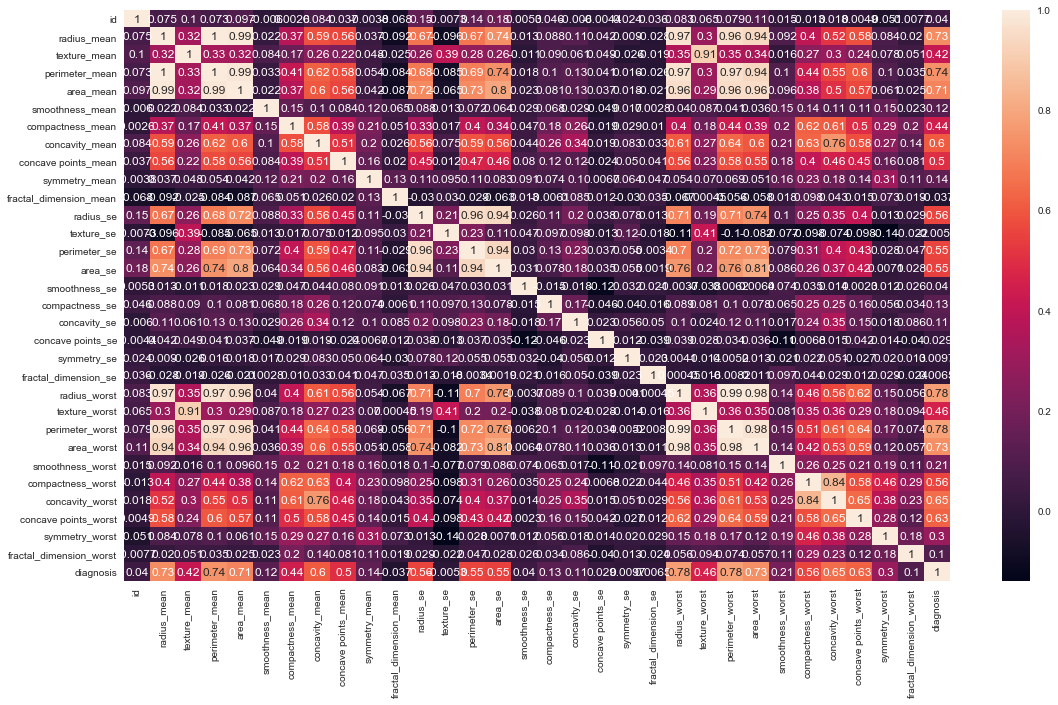

In [323]:
#%matplotlib inline

#Data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Data Visulization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.externals import joblib #saving the model
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE # balancing data
#Data Modeling 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

###### Classifiers #####
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


def get_data(csv_file_name):
    
    """
    Gets the data file
    """
    
    # Making a list of missing value types
    missing_values = ["n/a", "na", "--", ""]
       
    # read the csv file 
    df = pd.read_csv(csv_file_name, skipinitialspace=True, na_values=missing_values)
    
    # convert categorical 'diagnosis' to numerical
    cleanup_nums = {"diagnosis":{"B": 0, "M": 1}}
    df.replace(cleanup_nums, inplace=True)
    
    df = df.fillna(df.mean())

    # save the cleaned data for the future!
    df.to_csv('data_cleaned.csv')
    
    return df


def correlation_test(df):
    """
    displays the corelations among all the features of input data frame
    """
    plt.figure(figsize=(12, 8))
    fig=plt.figure()
    fig.set_size_inches(18.5, 10.5)
    vg_corr = df.corr()
    sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True)


def model_ML(data):
        
    """
    creates a machine learning model using RandomForestClassifier 
    uses pipeline to impute the missing values and replace with most frequent strategy
    standardizes the features to get standard normally distributed data  
    """
    
    #ID number does not add any value to our model, hence I remove it.
    y = data['diagnosis'].values #target
    X = data.drop(['id','diagnosis'], axis=1).values #features 

    imp = SimpleImputer(missing_values=np.nan, strategy='mean') #setup the imputation

    #n_estimators (The number of trees in the forest)
    clf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=2)
     
    ### oversampling 
    sm = SMOTE(random_state=42)
    X_res, y_res = sm.fit_sample(X, y)

    steps = [('imputation', imp),
             ('scaler', StandardScaler()),
             ('clf', clf )]
    
    pipeline = Pipeline(steps) # creat piplien 
    X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 2)
    model = pipeline.fit(X_train, y_train) #fit the model
    y_pred = pipeline.predict(X_test) # predict the response
    y_prob= pipeline.predict_proba(X_test) # prob for each record
    
    # evaluate accuracy - #whether or not the model has over fited
    print('ML model accuracy score for the test:', pipeline.score(X_test,y_test)) 
    print ("ML model accuracy score:", accuracy_score(y_test, y_pred))
    
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    
    ### Model Performance #### 
    target_names = ['Benign', 'Malignant']
    
    # making prediction for out of sample data
    sample = pd.read_csv('Predict_these_cases.csv', skiprows=[0], usecols=range(1,31))

    
    preds = model.predict(sample) 
    pred_churn = [target_names[p] for p in preds] 
    print("Predictions:", pred_churn)

    return model

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    fig.set_size_inches(18.5, 10.5)
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name + " distr.")
    plt.show()
    fig.savefig('histograms.png', dpi=100)

    
def main():
    """
    Main entry of the program
    """
    csv_file_name = 'Data_to_applicants.csv'
    df = get_data(csv_file_name)
    model = model_ML(df)
    
    draw_histograms(df, df.columns, 6, 6)
    correlation_test(df)
    
    #save the model for the future!
    joblib.dump(model, 'cancer_ML.pkl')

    return
    
if __name__ == "__main__":
    main()

In [267]:
#Exploratory data analysis

In [268]:
df = pd.read_csv('Data_to_applicants.csv', index_col=['id'])

In [269]:
df.sample(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
8812411,11.207,19.120,71.363,351.863,0.133,0.040,0.086,0.017,0.321,0.136,...,26.808,82.636,442.272,0.141,0.150,0.110,0.107,0.303,0.012,B
868019,17.215,15.193,111.704,834.561,0.147,0.105,0.086,0.108,0.214,0.017,...,21.098,125.256,1011.015,0.222,0.275,0.158,0.090,0.320,-0.006,B
894620,12.609,11.715,80.829,448.144,0.053,0.026,-0.009,0.002,0.230,0.076,...,14.007,88.996,512.539,0.234,0.155,0.099,0.065,0.383,-0.045,B
858024,19.983,20.532,131.846,1131.801,0.084,0.136,0.135,0.159,0.231,0.072,...,26.444,148.012,1447.381,0.142,0.287,0.291,0.136,0.298,0.180,M
884484,12.426,19.880,80.982,426.603,0.163,0.154,0.096,0.113,0.198,0.122,...,30.596,95.435,518.153,0.214,0.527,0.813,0.094,0.405,0.141,B
908041,11.438,16.460,73.930,365.604,0.144,0.069,0.063,-0.040,0.209,0.070,...,23.682,89.224,482.466,0.127,0.277,0.314,0.008,0.293,0.112,B
91544633,13.399,21.995,87.136,496.384,0.219,0.202,0.026,0.104,0.144,0.028,...,26.455,93.290,564.582,0.093,0.259,0.286,0.007,0.335,0.072,B
9112228,13.001,23.648,84.148,473.315,0.127,0.078,0.180,0.043,0.120,-0.002,...,30.863,91.562,555.715,0.061,0.338,0.348,0.128,0.214,0.123,B
871833,21.434,19.870,143.166,1330.072,0.005,0.250,0.234,0.034,0.131,0.068,...,28.865,191.634,2445.413,0.069,0.496,0.855,0.208,0.401,0.008,M


In [270]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            1
compactness_mean           1
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     1
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    1
smoothness_se              0
compactness_se             0
concavity_se               1
concave points_se          1
symmetry_se                1
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            1
area_worst                 1
smoothness_worst           0
compactness_worst          1
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [271]:
df.shape

(569, 31)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842934 to 93383
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            568 non-null float64
compactness_mean           568 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     568 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    568 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               568 non-null float64
concave points_se          568 non-null float64
symmetry_se             

In [273]:
df.dropna(inplace=True)

In [274]:
df.shape

(560, 31)

In [275]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
id,,,,,,,,,,,,,,,,,,,,,
842934,19.772,11.336,134.599,1096.771,0.067,0.326,0.385,0.221,0.217,0.099,...,19.029,202.212,2211.972,0.212,0.737,0.781,0.287,0.466,0.133,M
843149,22.601,19.453,145.467,1452.768,0.099,0.052,0.042,0.151,0.191,0.140,...,25.600,173.949,2143.103,0.137,0.282,0.311,0.184,0.302,0.196,M
84301535,21.507,23.214,142.380,1317.998,0.111,0.266,0.241,0.197,0.166,0.081,...,28.073,167.074,1872.370,0.119,0.395,0.459,0.300,0.361,0.126,M
84348933,12.505,22.374,85.098,423.055,0.275,0.252,0.280,0.107,0.250,0.120,...,28.946,108.286,622.059,0.168,0.971,0.728,0.266,0.737,0.349,M
84359034,22.227,15.690,148.024,1420.916,-0.032,0.261,0.230,0.120,0.120,0.087,...,18.287,166.754,1725.556,0.161,0.234,0.464,0.336,0.218,0.107,M


In [276]:
df['diagnosis'].value_counts()

B    352
M    208
Name: diagnosis, dtype: int64

In [277]:
# convert categorical diagnosis to numerical
cleanup_nums = {"diagnosis":{"B": 0, "M": 1}}
df.replace(cleanup_nums, inplace=True)

In [278]:
#ID number does not add any value to our model, hence I remove it.
X = df.drop(['diagnosis'], axis=1).values #features 
y = df['diagnosis'].values #target

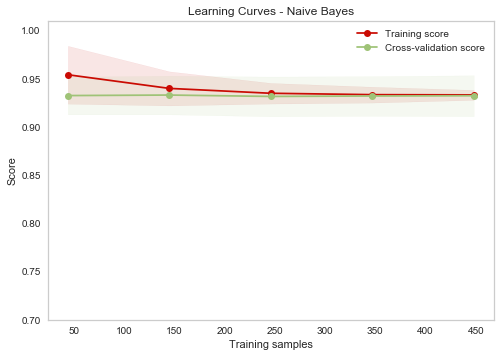

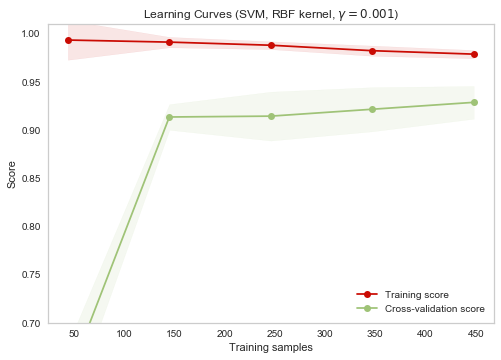

In [279]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training samples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves - Naive Bayes"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

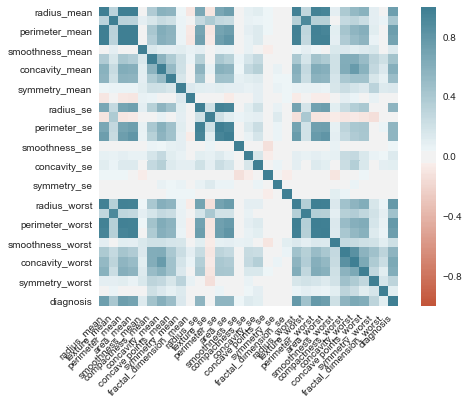

In [280]:
#correlation matrix heatmap
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);